In [1]:
!apt install libgraphviz-dev
!pip install pygraphviz

!pip install pydoxtools[etl,inference] pygraphviz
!sudo apt-get install graphviz poppler-utils # for generating images from pdfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
poppler-utils is already the newest version (22.02.0-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


## analyze sample html + optional pdf

In [2]:
import pydoxtools as pdx
import pydoxtools.visualization as vis

In [3]:
# pdf_file=random.choice(files)
readme_file='https://github.com/Xyntopia/pydoxtools#readme'
pdf_file ='https://datasheets.raspberrypi.com/cm4/cm4-datasheet.pdf'

In [4]:
# pdf.table_df0[5]

In [5]:
# print(page_template)

## Do some layout document analysis

In [6]:
pages=[15]
pdf = pdx.Document(pdf_file, page_numbers=pages)
x = pdf.x("elements", disk_cache=True)

In [7]:
pdf.page_set

{15}

In [8]:
#print(pdf.page_templates()[8])

(<Figure size 1600x1200 with 1 Axes>,)

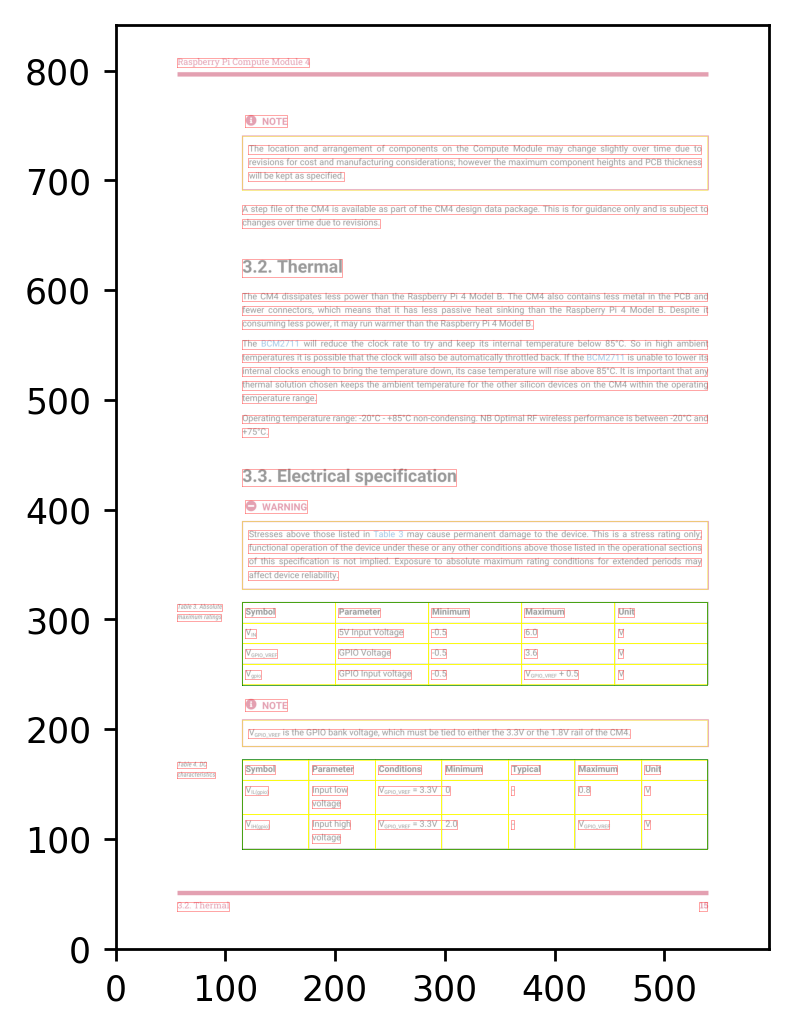

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pydoxtools.visual_document_analysis as vda
page=pages[0]
vda.plot_box_layers(
    box_layers=[
        [pdf.line_elements[vda.box_cols].values, vda.LayerProps(alpha=0.5, color="red", filled=False)],
        [pdf.image_elements[vda.box_cols].values, vda.LayerProps(alpha=0.5, color="blue", filled=False)],
        [pdf.graphic_elements[vda.box_cols].values, vda.LayerProps(alpha=0.5, color="yellow", filled=False)],
        [pdf.table_areas[vda.box_cols].values, vda.LayerProps(alpha=1.0, color="green", filled=False)],
        # [candidate_areas, vda.LayerProps(alpha=1.0, color="green", filled=False)],
        # [tables[box_cols].values, vda.LayerProps(alpha=1.0, color="red", filled=False)],
        # [figures[box_cols].values, vda.LayerProps(alpha=1.0, color="green", filled=False)],
        # [text[box_cols].values, vda.LayerProps(alpha=1.0, color="blue", filled=False)],
        # [p.df_le[vda.box_cols].values, vda.LayerProps(alpha=0.1, color="blue")],
        # [t.df_ch[vda.box_cols].values, vda.LayerProps(alpha=1.0, color="yellow", filled=False)],
        # [t.df_words[vda.box_cols].values, vda.LayerProps(alpha=0.3, color="random", filled=True)]
    ],
    bbox=pdf.pages_bbox[page], dpi=250,
    image=pdf.images[page],
    image_box=pdf.pages_bbox[page],
),

access the tables as pandas dataframe!

In [10]:
pdf.tables_df[0]

x           0                   1        2                 3     4
0      Symbol           Parameter  Minimum           Maximum  Unit
1         VIN    5V Input Voltage     -0.5               6.0     V
2  VGPIO_VREF        GPIO Voltage     -0.5               3.6     V
3       Vgpio  GPIO Input voltage     -0.5  VGPIO_VREF + 0.5     V

## document templates for llms

In [11]:
from pydoxtools import document_base
pdf = pdx.Document(pdf_file, page_numbers=[16,17])
print("".join(f"\n\n-------- {{page_{p}}} --------\n\n" + pdf.page_templates(exclude=document_base.ElementType.Table)[p] for p in pdf.page_set))



-------- {page_16} --------

Raspberry Pi Compute Module 4

{Table0}

Refer to interface specifications (see Chapter 2) for electrical details of other interfaces.

Table 5. Power

consumption

{Table1}

 NOTE

The figures in Table 5 greatly depend on the end application.

3.3. Electrical specification

16

-------- {page_17} --------

Raspberry Pi Compute Module 4

Chapter 4. Pinout

Table 6. Pinout for the

Raspberry Pi Compute

Module 4

{Table2}

Chapter 4. Pinout

17


most important keywords

In [12]:
pdf.keywords

['typically 3.3V signal']

## extract summary information

In [13]:
readme_doc = pdx.Document(readme_file)

most important sentences

In [14]:
readme_doc.textrank_sents

["As an example, consider this pipeline for *.png images from the repository, which includes OCR, keyword extraction, vectorization, and more:\n\nPipelines can be mixed, partially overwritten, and extended, giving you a lot of possibilities to extend and adapt the functionality for your specific use case.\n\nTo learn more about Pydoxtools' large pipelines feature, please refer to the documentation.\n\n",
 'Describe more of the features here...\n• analyze documents using any model from huggingface\n• download document from URL "manually" and then feed to document\n• extract addresses and use this information for the qam\n\nIf you simply want to get going, you can install the following libraries on your system which will do evrything for you:\n\nBelow are some explanation what the different\n\nIn order to be able to load docx, odt and rtf files, you have to install pandoc.',
 'Pydoxtools is a library that provides a sophisticated interface for reading and writing documents, designed to w

In [15]:
readme_doc.language

'en'

In [16]:
readme_doc.page_set

{0}

a real summary

In [17]:
readme_doc.slow_summary # it will give a hint for "indexing errors" which you can safely ignore, its a bug in huggingface.

Token indices sequence length is longer than the specified maximum sequence length for this model (1245 > 1024). Running this sequence through the model will result in indexing errors


'Pydoxtools is a library that provides a sophisticated interface for reading and writing documents, designed to work with AI models such as GPT, Alpaca, and Huggingface. It offers functionalities such as integration with AI (LLMs and more) models, support for most of todays document formats. The library allows for the creation of complex extraction pipelines for batch-processing.'

## list of all available functions for this document type

In [18]:
# list of all avialable extraction functions
readme_doc.x_funcs.keys()

dict_keys(['data', 'page_set', 'full_text', 'clean_text', 'meta', 'page_templates', 'file_meta', 'text_box_elements', 'text_box_list', 'tables_df', 'tables_dict', 'tables', 'addresses', 'page_classifier', 'num_pages', 'num_words', 'num_sents', 'a_d_ratio', 'language', 'spacy_model_size', 'spacy_model', 'spacy_doc', 'spacy_nlp', 'spacy_vectors', 'spacy_embeddings', 'spacy_sents', 'spacy_noun_chunks', 'entities', 'url', 'relationships', 'coreference_method', 'graph_debug_context_size', 'coreferences', 'graph_nodes', 'node_map', 'graph_edges', 'knowledge_graph', 'sents', 'noun_chunks', 'vector', 'sent_vecs', 'sent_ids', 'noun_vecs', 'noun_ids', 'vectorizer_model', 'vectorizer_only_tokenizer', 'vectorizer_overlap_ratio', 'vectorizer', 'vec_res', 'tok_embeddings', 'tokens', 'embedding', 'min_size_text_segment', 'max_size_text_segment', 'text_segment_overlap', 'max_text_segment_num', 'text_segments', 'text_segment_vec_res', 'text_segment_vecs', 'text_segment_ids', 'text_segment_index', 'segm

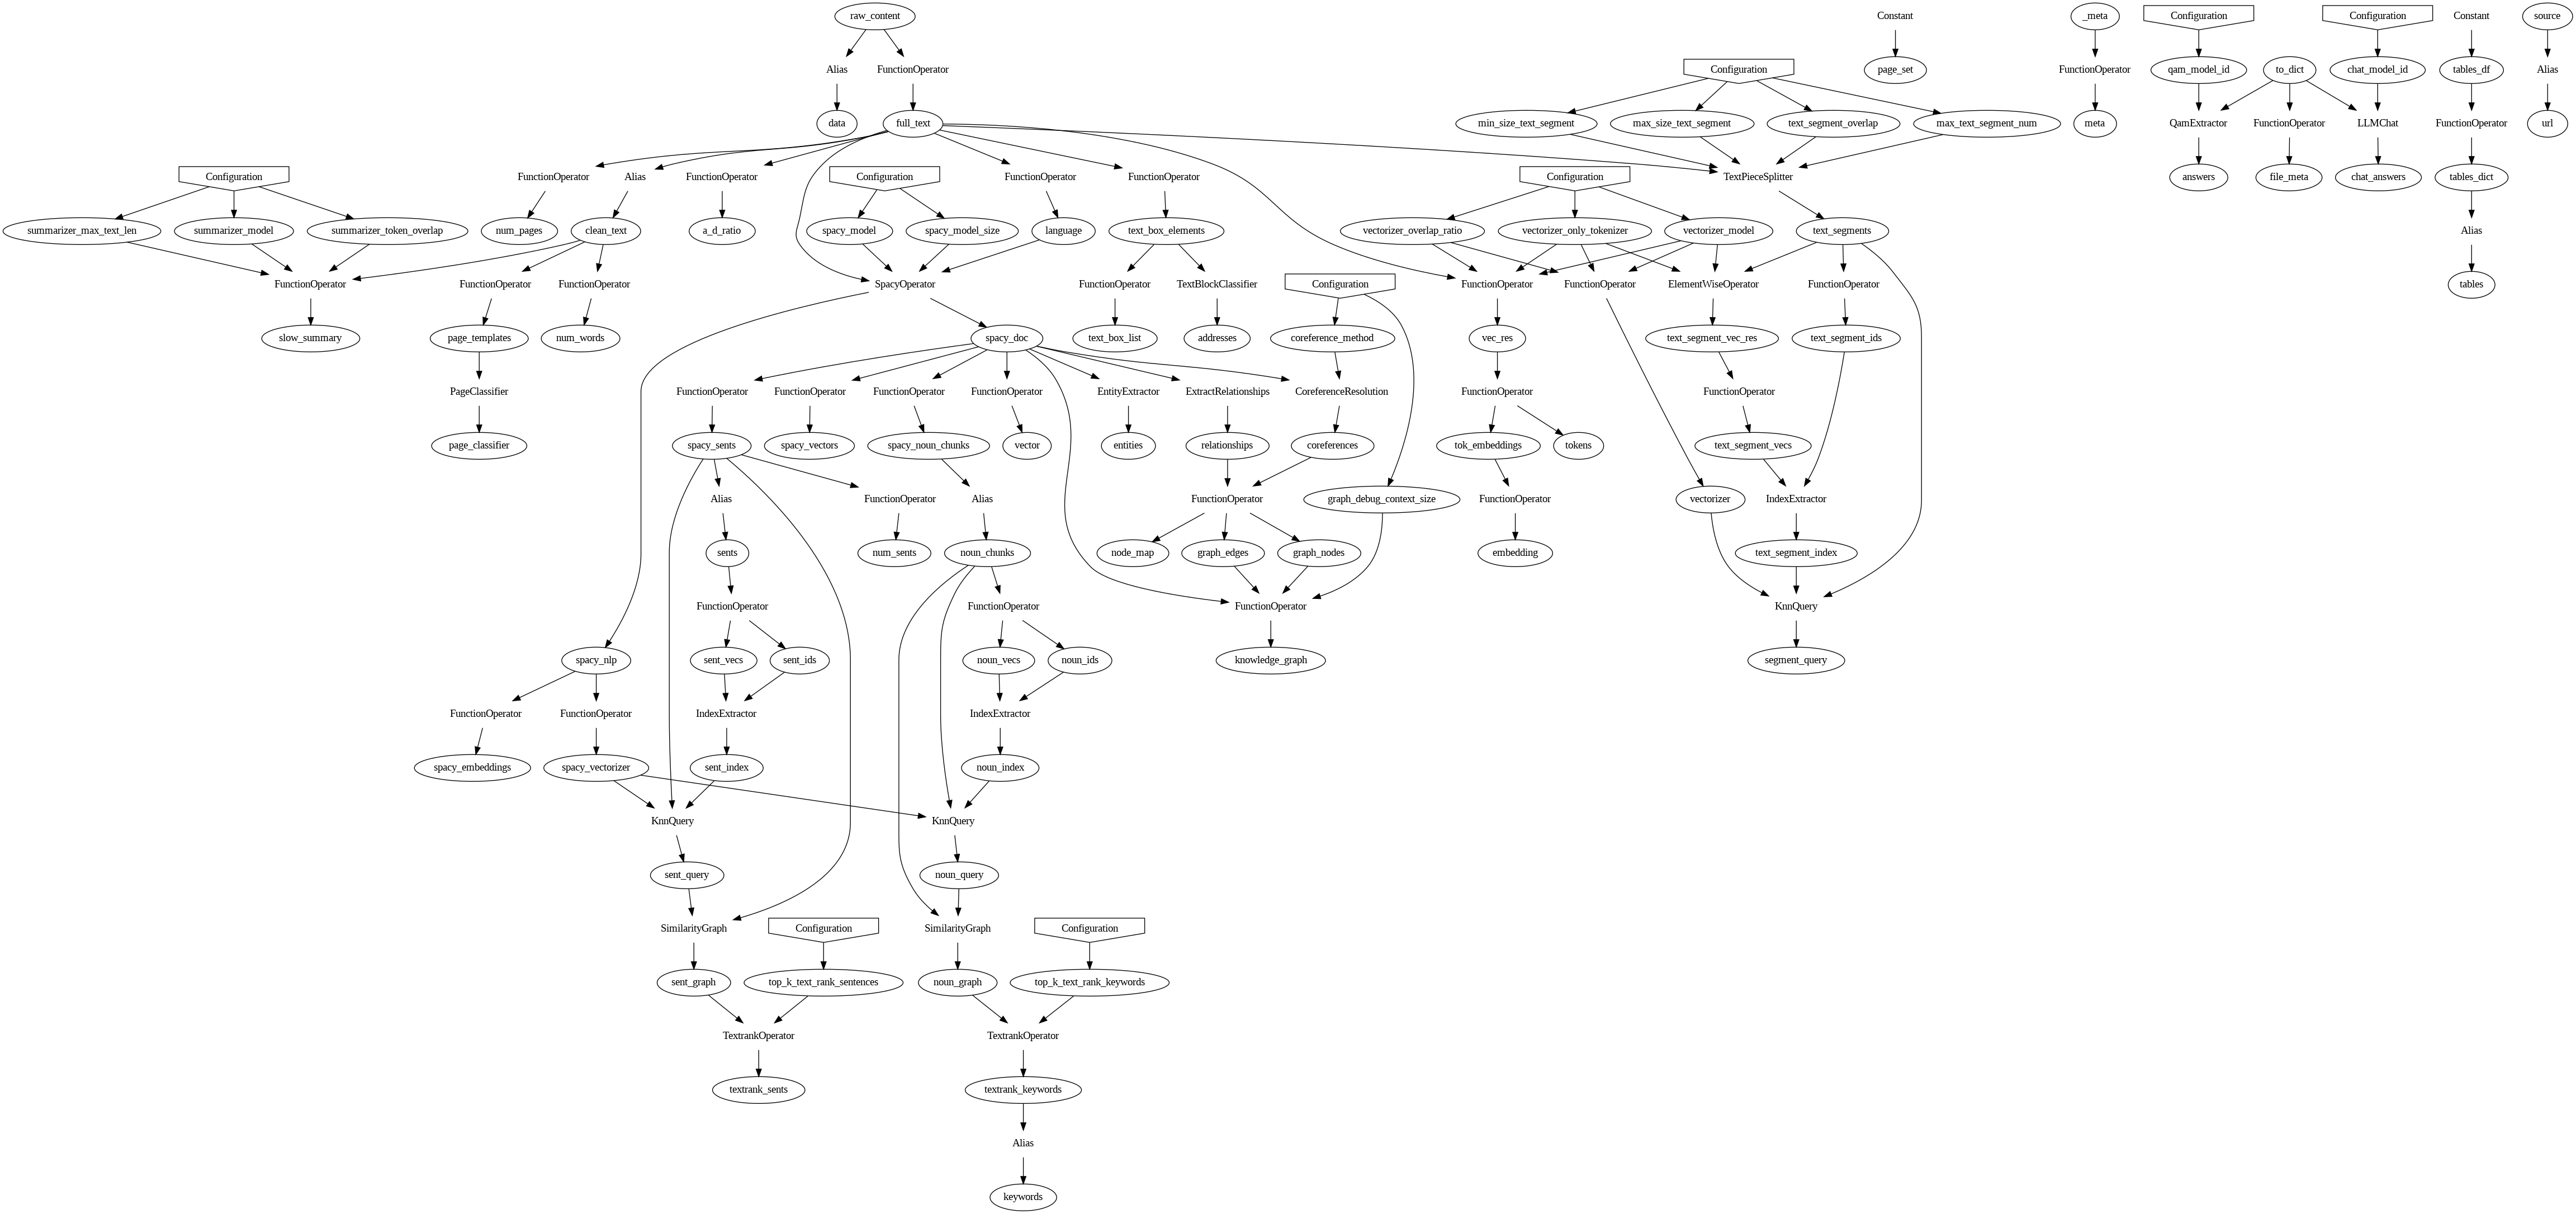

In [19]:
from IPython.display import SVG, display, HTML, Image
# extraction pipeline graph
G= readme_doc.pipeline_graph()
img = G.draw(format="png", prog="dot")
Image(img)

## extract a knowledge graph

In [20]:
#pdf.noun_graph

In [21]:
wiki_file= 'https://en.wikipedia.org/wiki/Rocket'
wikidoc = pdx.Document(wiki_file, spacy_model_size="sm", coreference_method="fast")
KG = wikidoc.x("knowledge_graph",disk_cache=True)

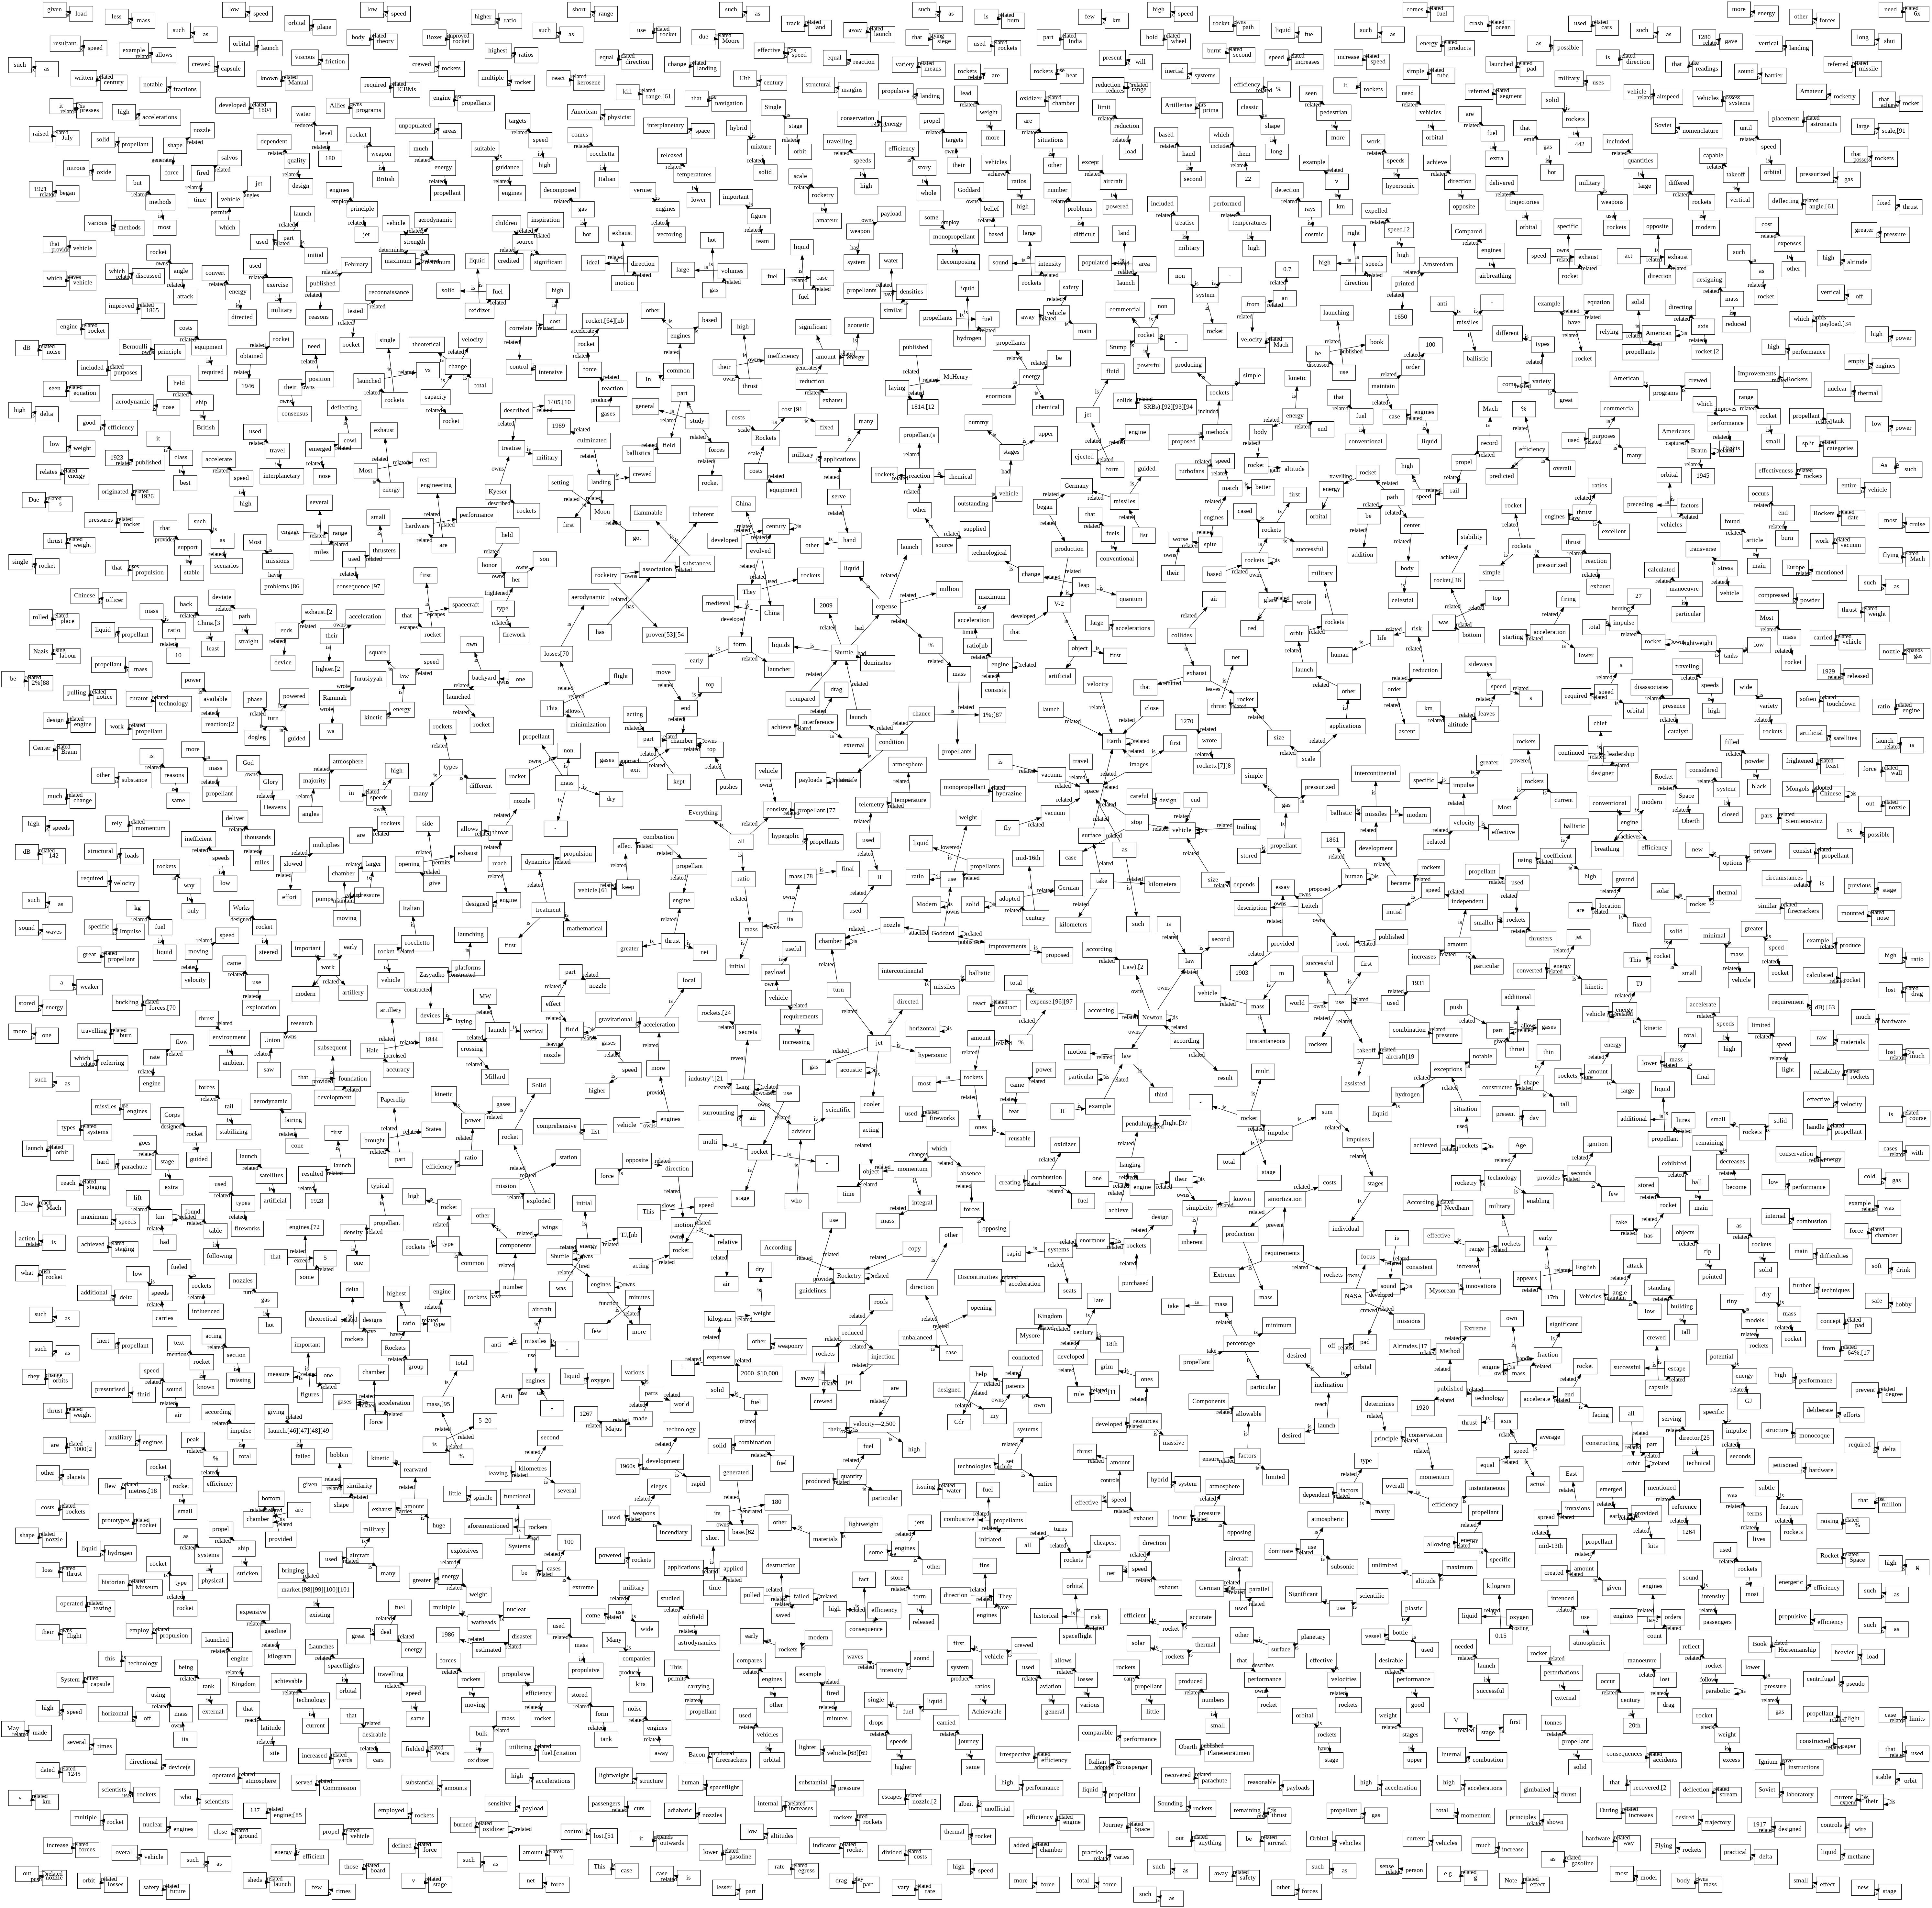

In [22]:
# and visualize...
jpg = vis.draw(KG, engine="fdp", format='jpg')
Image(jpg)

simply get a table of all nodes in the graph

In [23]:
# get a list of nodes of the graph
pdf.x("graph_nodes")

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

label   idx          toks tok_idx
group                                        
10            low    10         [low]    {10}
12        voltage    12     [voltage]    {12}
94        current    94     [current]    {94}
96         Output    96      [Output]    {96}
97            low    97         [low]    {97}
...           ...   ...           ...     ...
1022         GPIO  1022        [GPIO]  {1022}
1036   connecting  1036  [connecting]  {1036}
1041         GPIO  1041        [GPIO]  {1041}
1055   connecting  1055  [connecting]  {1055}
1060      Chapter  1060     [Chapter]  {1060}

[147 rows x 4 columns]

In [24]:
import networkx as nx
# Find the weakly connected components
weakly_connected_components = nx.weakly_connected_components(KG)

# Find the largest weakly connected component
sorted_weakly_connected_component = sorted(weakly_connected_components, key=len)

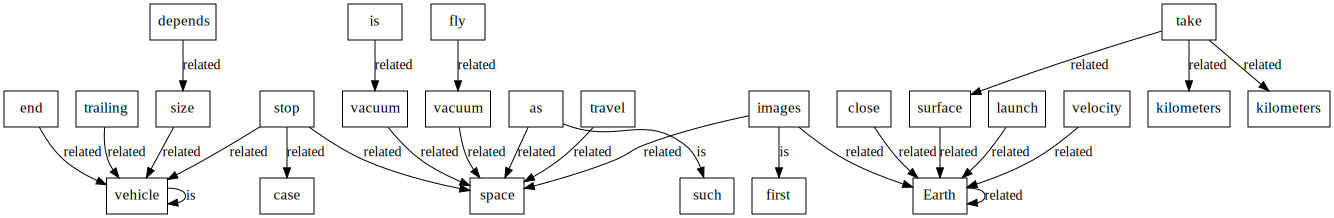

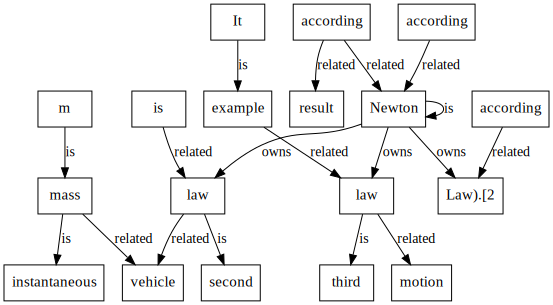

In [25]:
# draw the x largest islands
x=3
for i in range(1,x):
    display(vis.draw(KG.subgraph(sorted_weakly_connected_component[-i]), format="svg"))